# **Pembelajaran Mesin H**
### **Muhammad Aqil Farrukh / 502522158**
### **Tugas 2 K-Means Clustering**


1. Mensuppress Warnings: Kode pertama mendefinisikan sebuah fungsi warn() yang tidak melakukan apa-apa (pass). Kemudian, modul warnings diimpor, dan fungsi warn() yang telah didefinisikan sebelumnya digunakan untuk menggantikan fungsi warn bawaan dari modul tersebut. Hal ini dimaksudkan untuk menonaktifkan atau menyuppress pesan peringatan yang mungkin muncul selama eksekusi kode.

2. Import Libraries: Kode tersebut mengimpor beberapa library yang umum digunakan dalam analisis data dan pembelajaran mesin, termasuk:

* random: Untuk menghasilkan bilangan acak.
* numpy (diimpor sebagai np): Library yang digunakan untuk operasi numerik dan array.
* pandas (diimpor sebagai pd): Library yang digunakan untuk  manipulasi dan analisis data.
* matplotlib.pyplot (diimpor sebagai plt): Library yang digunakan untuk membuat visualisasi data.
* sklearn.cluster.KMeans: Kelas yang digunakan untuk melakukan klasterisasi dengan metode K-Means.
* sklearn.datasets.make_blobs: Fungsi yang digunakan untuk membuat dataset berbentuk blob (bercak) dengan berbagai properti tertentu.
3.  Inline Plotting: %matplotlib inline adalah sebuah magic command yang digunakan dalam lingkungan Jupyter Notebook atau IPython untuk menampilkan plot matplotlib di dalam notebook secara langsung setelah kode.

Dengan demikian, keseluruhan kode tersebut persiapan awal untuk melakukan analisis data dan klasterisasi dengan menggunakan K-Means, serta menampilkan visualisasi hasilnya di dalam notebook.`

In [9]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

### **Menggunakan dataset personality customer, dilakukan data preprocessing, EDA, dan K-Means Clustering, lalu analisis hasil K-Means**

In [10]:

dataF = pd.read_csv('marketing_campaign.csv',delimiter='\t')
dataF.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Baris kode dataF = pd.read_csv('marketing_campaing.csv') digunakan untuk membaca file CSV yang disebut 'marketing_campaing.csv' ke dalam sebuah DataFrame menggunakan fungsi read_csv dari modul pandas.

Kemudian, dataF.head() digunakan untuk menampilkan lima baris pertama dari DataFrame dataF.

Jadi, dengan menggunakan kode ini, kita mengimpor data dari file CSV ke dalam sebuah DataFrame dan kemudian menampilkan lima baris pertama dari DataFrame tersebut.

In [11]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Fungsi dataF.info() memberikan ringkasan singkat tentang struktur dan informasi dari DataFrame dataF. Ini mencakup beberapa informasi penting seperti:

Jumlah total baris (entries) dalam DataFrame.
Jumlah kolom (columns) dalam DataFrame.
Daftar nama kolom beserta tipe data masing-masing kolom.
Jumlah nilai non-null (non-missing) dalam setiap kolom.
Penggunaan memori oleh DataFrame.
Dengan menjalankan dataF.info(), kita akan mendapatkan pemahaman yang lebih baik tentang struktur dan isi dari DataFrame dataF, termasuk apakah terdapat nilai yang hilang (missing values) dalam dataset dan tipe data dari setiap kolomnya.

In [12]:
dataF.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


Kemudian panggilan dataF.describe(include='all') memberikan ringkasan statistik deskriptif dari DataFrame dataF, termasuk kolom-kolom dengan tipe data numerik dan kategorikal. Ini mencakup informasi seperti:

* Count: Jumlah entri non-null (non-missing) untuk setiap kolom.
* Mean: Rata-rata nilai untuk setiap kolom.
* Std: Standar deviasi dari nilai untuk setiap kolom.
* Min: Nilai minimum untuk setiap kolom.
* 25th, 50th, 75th percentile: Kuartil ke-25, ke-50 (median), dan ke-75 untuk setiap kolom.
* Max: Nilai maksimum untuk setiap kolom.

In [13]:
dataF.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Panggilan dataF.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame dataF.

Misalnya, jika sebuah kolom memiliki nilai null, jumlahnya akan dihitung dan ditampilkan. Jika sebuah kolom tidak memiliki nilai null, maka jumlahnya akan nol.

In [14]:
dataF.duplicated().sum()

0

**Penjelasan Tentang Atribut Data**

Atribut Numerik:
1. Year_Birth: Tahun kelahiran pelanggan.
2. Income: Pendapatan tahunan pelanggan.
3. Kidhome: Jumlah anak di bawah usia 18 tahun di rumah tangga pelanggan.
4. Teenhome: Jumlah remaja di rumah tangga pelanggan.
5. Recency: Jumlah hari sejak pelanggan melakukan pembelian terakhir.
6. MntWines: Jumlah uang yang dihabiskan pelanggan untuk pembelian anggur.
7. MntFruits: Jumlah uang yang dihabiskan pelanggan untuk pembelian buah-buahan.
8. MntMeatProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk daging.
9. MntFishProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk ikan.
10. MntSweetProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk manis.
11. MntGoldProds: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk emas.
12. NumDealsPurchases: Jumlah pembelian dengan diskon yang dilakukan pelanggan.
13. NumWebPurchases: Jumlah pembelian yang dilakukan pelanggan melalui website.
14. NumCatalogPurchases: Jumlah pembelian yang dilakukan pelanggan melalui katalog.
15. NumStorePurchases: Jumlah pembelian yang dilakukan pelanggan melalui toko fisik.
16. NumWebVisitsMonth: Jumlah kunjungan pelanggan ke website per bulan.
17. AcceptedCmp3: Apakah pelanggan menerima penawaran kampanye 3.
18. AcceptedCmp4: Apakah pelanggan menerima penawaran kampanye 4.
19. AcceptedCmp5: Apakah pelanggan menerima penawaran kampanye 5.
20. AcceptedCmp1: Apakah pelanggan menerima penawaran kampanye 1.
21. AcceptedCmp2: Apakah pelanggan menerima penawaran kampanye 2.
22. Complain: Apakah pelanggan mengajukan keluhan.
23. Z_CostContact: Biaya kontak.
24. Z_Revenue: Pendapatan dari pelanggan.

Atribut Kategorikal:
1. Education: Tingkat pendidikan pelanggan.
2. Marital_Status: Status perkawinan pelanggan.
3. Dt_Customer: Tanggal pelanggan bergabung.
4. Response: Respon pelanggan terhadap kampanye pemasaran.

**Permasalahan yang Terdapat pada Data:**

1. Terdapat banyak kolom, baik numerik maupun kategorikal, yang memiliki nilai null.
2. Beberapa atribut mungkin tidak relevan atau tidak akan digunakan dalam Analisis Eksplorasi Data (EDA) dan Klasterisasi K-Means.


### **PRE PROCESSING**

Preprocessing data adalah proses persiapan data sebelum dilakukan analisis lebih lanjut. Tujuan dari preprocessing data adalah untuk membersihkan, menormalkan, dan mempersiapkan data agar dapat digunakan secara efektif dalam model atau algoritma machine learning.

 **Data Reduction**: Tahap ini melibatkan pengurangan dimensi data untuk mengurangi kompleksitas dan mempercepat proses analisis atau model. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Principal Component Analysis (PCA): Mengurangi dimensi data dengan menggabungkan fitur-fitur yang saling berkorelasi.
   - Feature Extraction: Mengubah data menjadi representasi yang lebih sederhana dan informatif, seperti menggunakan metode seperti t-SNE atau LDA.



In [33]:
dataF['total_spend_product'] = dataF['MntWines'] + dataF['MntFruits'] + dataF['MntMeatProducts'] + dataF['MntFishProducts'] + dataF['MntSweetProducts'] + dataF['MntGoldProds']
dataF['total_spend_place'] = dataF['NumDealsPurchases'] + dataF['NumWebPurchases'] + dataF['NumCatalogPurchases'] + dataF['NumStorePurchases']
dataF['Rata-rata-belanja'] = round(dataF['total_spend_product'] / dataF['total_spend_place'],2)
dataF

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spend_product,total_spend_place,Rata-rata-belanja
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,25,64.68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,6,4.50
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,21,36.95
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,8,6.62
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,19,22.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,1341,18,74.50
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,444,22,20.18
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,1241,19,65.32
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,843,23,36.65


**Data Cleaning**: Tahap ini melibatkan identifikasi dan penanganan masalah yang umum terjadi dalam data, seperti nilai yang hilang, data duplikat, format yang tidak tepat, dan outlier. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Menghapus baris atau kolom yang mengandung nilai yang hilang.
   - Mengisi nilai yang hilang dengan nilai rata-rata, median, atau modus.
   - Menghapus data duplikat.
   - Mendeteksi dan menangani outlier.

In [42]:
df = dataF[['Income','total_spend_place','Rata-rata-belanja']]
df['Rata-rata-belanja'] = df['Rata-rata-belanja'].replace(np.inf, np.nan)

In [43]:
df.isnull().sum()

Income               24
total_spend_place     0
Rata-rata-belanja     4
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2216 non-null   float64
 1   total_spend_place  2240 non-null   int64  
 2   Rata-rata-belanja  2236 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 52.6 KB


Text(0.5, 0, 'Rata-rata-belanja')

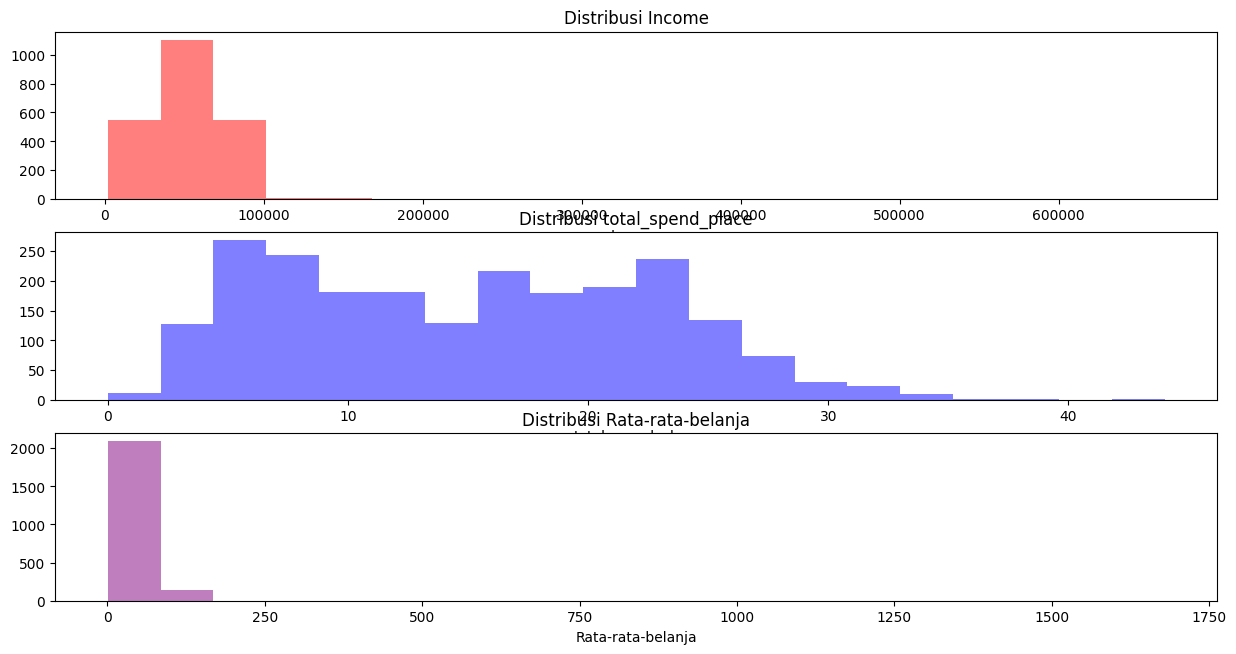

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['Income'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Income')
plt.xlabel('Income')

plt.subplot(4, 1, 2)
plt.hist(df['total_spend_place'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi total_spend_place')
plt.xlabel('total_spend_place')

plt.subplot(4, 1, 3)
plt.hist(df['Rata-rata-belanja'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Rata-rata-belanja')
plt.xlabel('Rata-rata-belanja')



In [48]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['total_spend_place'].fillna(df['total_spend_place'].median(), inplace=True)
df['Rata-rata-belanja'].fillna(df['Rata-rata-belanja'].mean(), inplace=True)
df.isnull().sum()

Income               0
total_spend_place    0
Rata-rata-belanja    0
dtype: int64

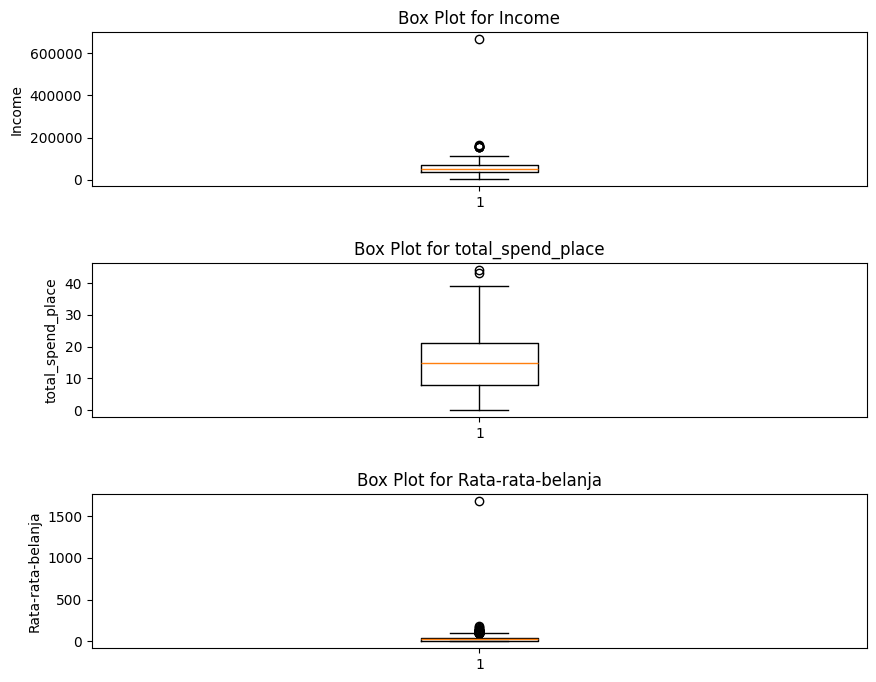

In [50]:
from scipy import stats
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df):
    axes[i].boxplot(df[column])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

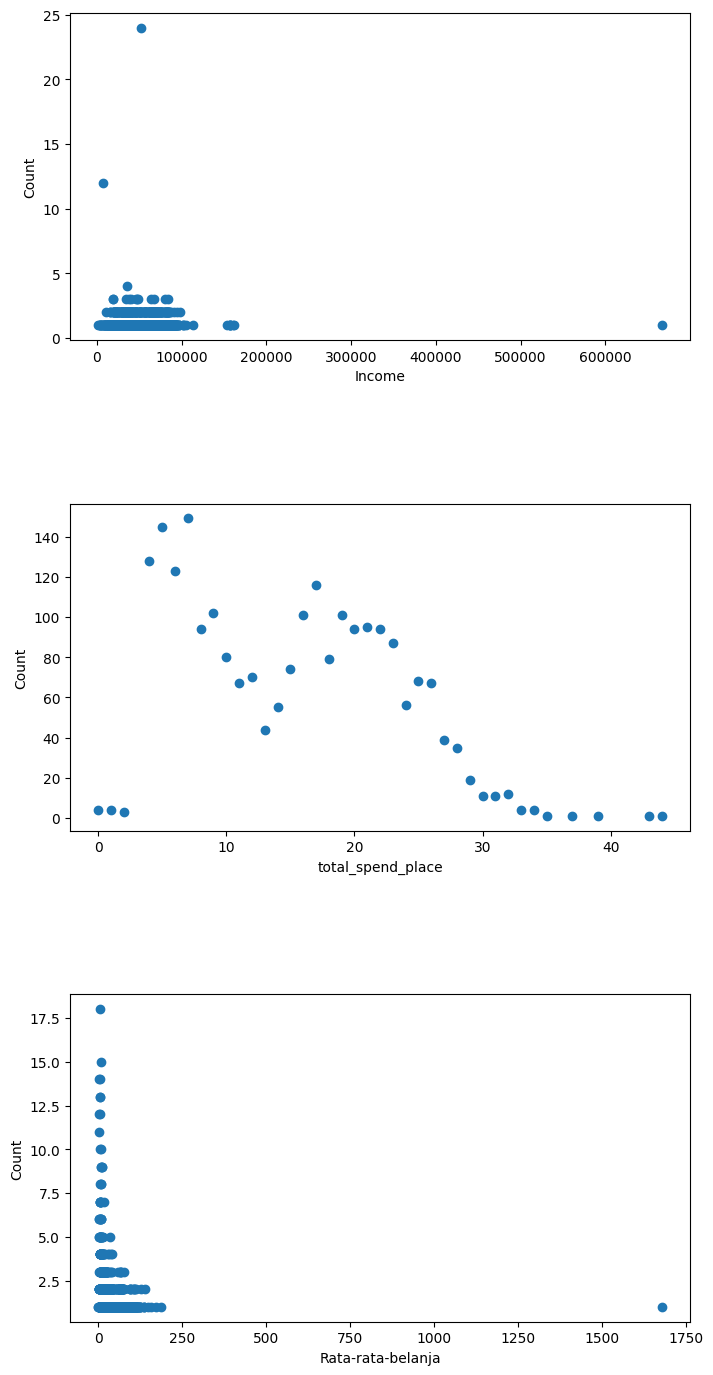

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(df):
    counts = df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    # axes[i].set_title(f'Scatter Plot for {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

In [60]:
from scipy import stats

z_scores = stats.zscore(df)
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.shape

(2224, 3)

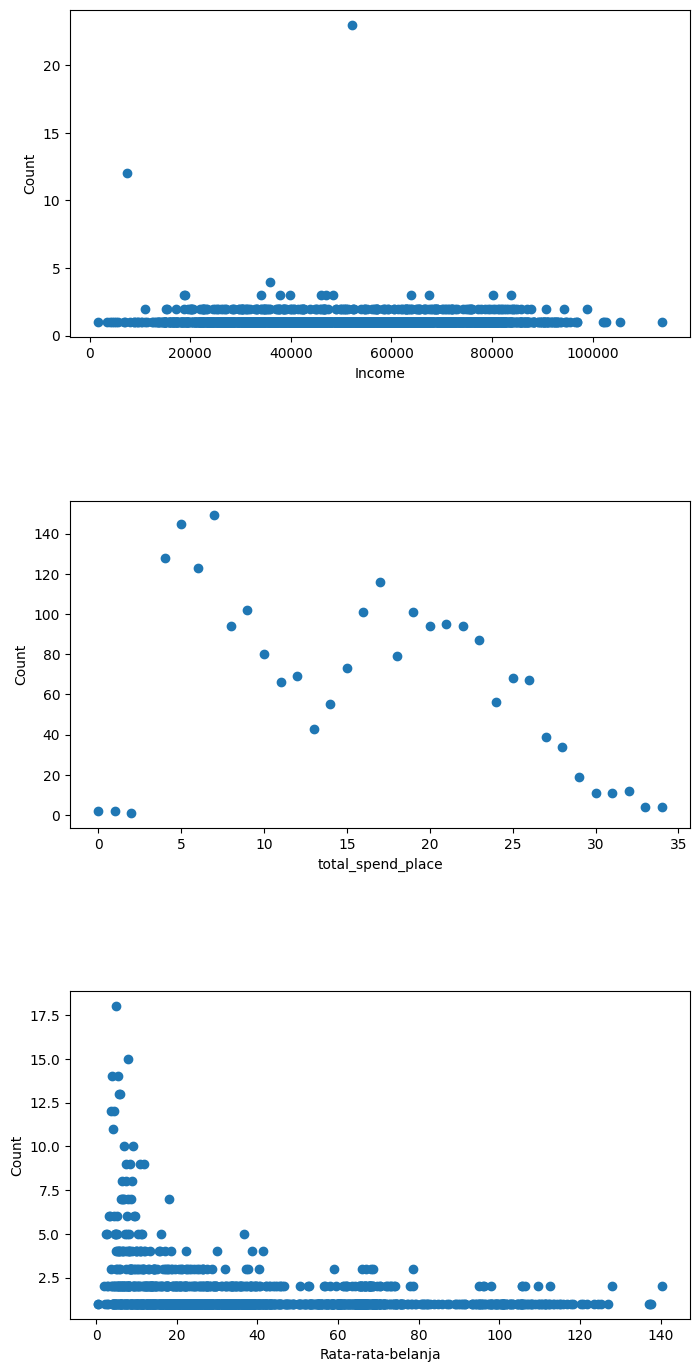

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(clean_df):
    counts = clean_df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    # axes[i].set_title(f'Scatter Plot for {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

In [64]:
df = clean_df
df

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21
...,...,...,...
2235,61223.0,18,74.50
2236,64014.0,22,20.18
2237,56981.0,19,65.32
2238,69245.0,23,36.65


<Axes: >

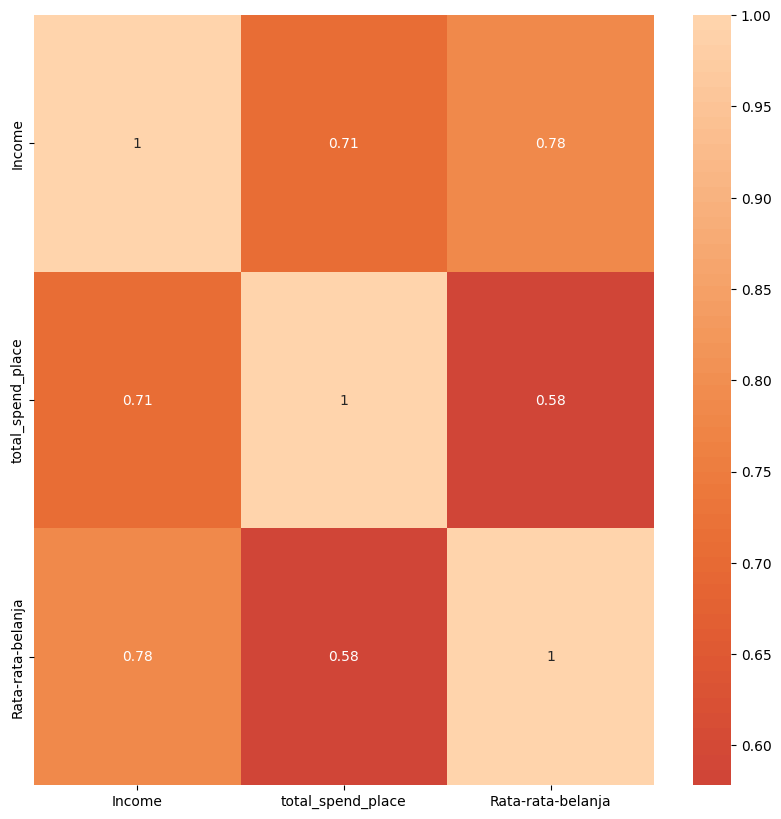

In [76]:
import seaborn as sns
corrmat= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, center=0)

## **K-MEANS**

K-Means adalah salah satu algoritma clustering yang paling umum digunakan dalam analisis data. Tujuan utama dari algoritma K-Means adalah untuk membagi dataset menjadi kelompok-kelompok yang homogen, yang disebut sebagai cluster, di mana setiap data dalam sebuah cluster memiliki karakteristik yang serupa. 

Berikut adalah prinsip dasar dari algoritma K-Means:

1. **Inisialisasi centroid**: Algoritma dimulai dengan menginisialisasi centroid (titik pusat) sebanyak K di dalam ruang fitur. Centroid ini adalah representasi dari pusat masing-masing cluster.

2. **Assignment**: Setiap data dalam dataset akan diberikan kepada cluster yang memiliki centroid terdekat dengan data tersebut. Jarak antara data dan centroid dapat diukur menggunakan berbagai metrik jarak, seperti jarak Euclidean.

3. **Pembaruan centroid**: Setelah setiap data diberikan kepada cluster yang sesuai, centroid baru dihitung untuk setiap cluster dengan mengambil rata-rata dari semua data dalam cluster tersebut.

4. **Iterasi**: Langkah 2 dan 3 diulangi sampai tidak ada perubahan dalam penugasan cluster atau hingga iterasi mencapai batas yang ditentukan sebelumnya.

5. **Konvergensi**: Algoritma konvergen ketika tidak ada lagi perubahan dalam penugasan cluster. Pada titik ini, K-Means telah menemukan pengelompokan optimal (atau sub-optimal) untuk dataset yang diberikan.

K-Means memiliki beberapa keunggulan, termasuk sederhana dan efisien dalam mengelompokkan data. Namun, algoritma ini juga memiliki beberapa kelemahan, seperti sensitif terhadap inisialisasi centroid awal dan tidak cocok untuk data yang memiliki bentuk atau ukuran cluster yang tidak teratur.

K-Means sering digunakan dalam berbagai aplikasi, termasuk segmentasi pelanggan, analisis citra, pengelompokan dokumen, dan lain-lain. Hal ini karena kemampuannya untuk mengelompokkan data secara efisien dan efektif, meskipun dengan asumsi tertentu tentang struktur data.

Preprocessing data adalah proses persiapan data sebelum dilakukan analisis lebih lanjut. Tujuan dari preprocessing data adalah untuk membersihkan, menormalkan, dan mempersiapkan data agar dapat digunakan secara efektif dalam model atau algoritma machine learning.

Berikut adalah beberapa tahapan dalam preprocessing data secara detail:

1. **Data Cleaning**: Tahap ini melibatkan identifikasi dan penanganan masalah yang umum terjadi dalam data, seperti nilai yang hilang, data duplikat, format yang tidak tepat, dan outlier. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Menghapus baris atau kolom yang mengandung nilai yang hilang.
   - Mengisi nilai yang hilang dengan nilai rata-rata, median, atau modus.
   - Menghapus data duplikat.
   - Mendeteksi dan menangani outlier.

2. **Data Transformation**: Tahap ini melibatkan transformasi data agar sesuai dengan kebutuhan analisis atau model yang akan digunakan. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Normalisasi: Mengubah skala data agar memiliki rentang yang seragam, seperti menggunakan metode min-max scaling atau z-score scaling.
   - Encoding: Mengubah data kategorikal menjadi representasi numerik, seperti menggunakan one-hot encoding atau label encoding.
   - Feature Scaling: Mengubah skala fitur agar memiliki rentang yang seragam, seperti menggunakan metode min-max scaling atau standardization.

3. **Feature Selection**: Tahap ini melibatkan pemilihan fitur yang paling relevan dan berpengaruh dalam analisis atau model yang akan digunakan. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Univariate Selection: Memilih fitur berdasarkan hubungannya dengan variabel target menggunakan metode seperti chi-square test atau ANOVA.
   - Feature Importance: Menggunakan algoritma machine learning untuk mengevaluasi pentingnya setiap fitur dalam model.
   - Correlation Matrix: Menghapus fitur yang memiliki korelasi tinggi dengan fitur lainnya.

4. **Data Integration**: Tahap ini melibatkan penggabungan data dari berbagai sumber atau sumber yang berbeda menjadi satu dataset yang lengkap. Hal ini dapat melibatkan penggabungan kolom atau baris, penggabungan data dari file yang berbeda, atau penggabungan data dari database yang berbeda.

5. **Data Reduction**: Tahap ini melibatkan pengurangan dimensi data untuk mengurangi kompleksitas dan mempercepat proses analisis atau model. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Principal Component Analysis (PCA): Mengurangi dimensi data dengan menggabungkan fitur-fitur yang saling berkorelasi.
   - Feature Extraction: Mengubah data menjadi representasi yang lebih sederhana dan informatif, seperti menggunakan metode seperti t-SNE atau LDA.

Setelah melakukan preprocessing data, data siap untuk digunakan dalam analisis lebih lanjut, seperti eksplorasi data, visualisasi, atau pemodelan machine learning.

In [77]:
df.head()

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21


In [78]:
from sklearn.preprocessing import StandardScaler
Normalisasi = StandardScaler().fit_transform(df)
Normalisasi

array([[ 0.31706237,  1.34168988,  1.15650323],
       [-0.25703995, -1.16780231, -0.99343123],
       [ 0.97299155,  0.81337573,  0.16584716],
       ...,
       [ 0.26074251,  0.54921866,  1.17936727],
       [ 0.85772325,  1.07753281,  0.15512964],
       [ 0.06058067, -0.50740963, -0.59545399]])

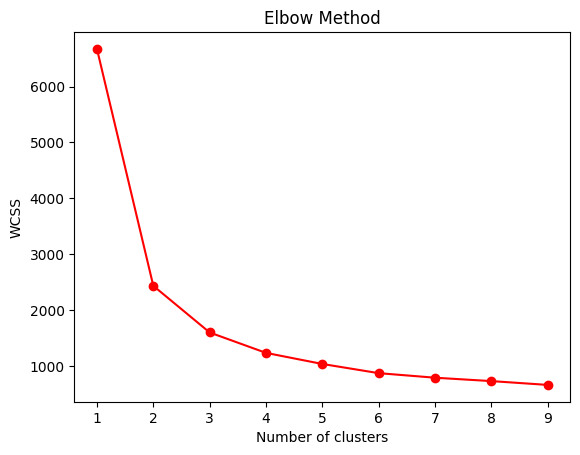

In [87]:
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init="k-means++", random_state = 42)
    km.fit(Normalisasi)
    wcss.append(km.inertia_)

plt.plot(np.arange(1, 10), wcss, marker='o', color='red')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.show()

Untuk grafik di atas, nilai K optimal adalah 3. Seperti yang kita lihat, dengan bertambahnya jumlah cluster, nilai WCSS menurun. Kami memilih nilai K berdasarkan tingkat penurunan WCSS. Misalnya, dari cluster 1 dan 2 pada grafik di atas kita melihat penurunan WCSS yang tiba-tiba dan sangat besar. Setelah 3 penurunannya minimal dan karenanya saya memilih 3 sebagai nilai optimal untuk K.

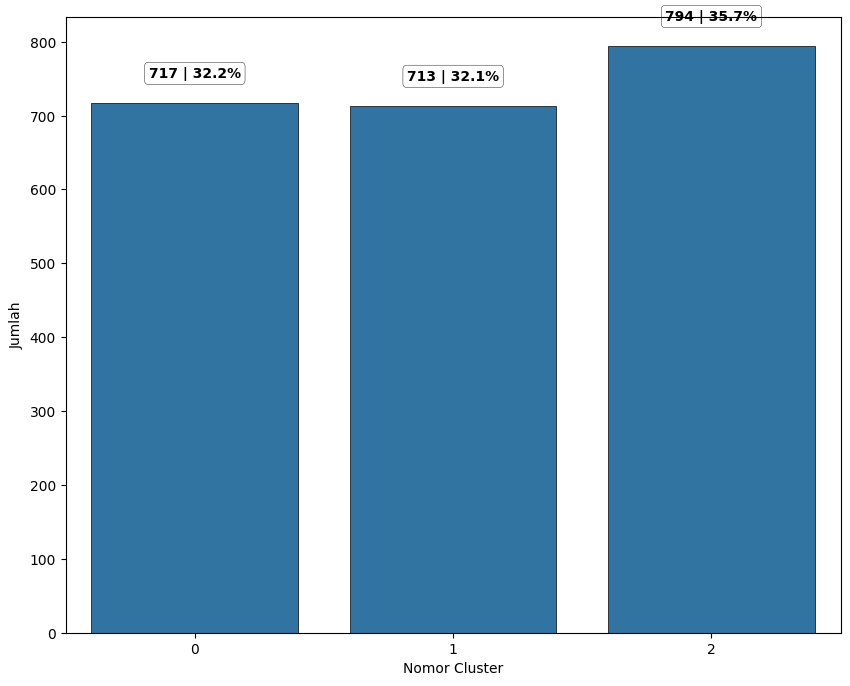

In [102]:
# Number of clusters
k = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

#Returns a label for each data point based on the number of clusters
def setup_plot(X_label, y_label):
    plt.figure(figsize=(10, 8))
    plt.xlabel(X_label)
    plt.ylabel(y_label)
    return plt.gca()

cluster = sns.barplot(y=df['Cluster'].value_counts().values,x=df['Cluster'].value_counts().index,linewidth=0.5,ec='black',ax=setup_plot(X_label='Nomor Cluster',y_label='Jumlah'),zorder=2)
for p in cluster.patches:
    value = f'{p.get_height():,.0f} | {(p.get_height()/df.shape[0]):,.1%}'
    x = p.get_x() + p.get_width() /2
    y = p.get_y() + p.get_height() + 40 
    cluster.text(x, y, value, ha='center', va='center', fontsize=10, color='black', fontweight='bold',
    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()